# Machine Learning: Introdução a Classificação com SKLearn

[Link para o Curso](https://cursos.alura.com.br/course/machine-learning-introducao-a-classificacao-com-sklearn)

In [67]:
import warnings
warnings.filterwarnings('ignore')

* Analisaremos quatro projetos e conjuntos de dados diferentes, sobre os quais tentaremos classificar informações em duas categorias distintas — isto é, usaremos algoritmos de machine learning para classificação

## 1️⃣ Introdução a Classificação

In [71]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [72]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [73]:
x = dados[["principal","como_funciona","contato"]]
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [74]:
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [75]:
dados.shape

(99, 4)

In [76]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [77]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


### Usando a biblioteca para separar treino e teste

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [80]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [81]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [83]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [84]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

## 2️⃣ Lendo Dados da Internet, Testes Replicáveis e Estratificação

### Lendo Dados da Internet

In [2]:
import pandas as pd 

uri='https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(uri)

In [3]:
# Renomeando colunas
dici = {
        "home" : "principal",
        "how_it_works" : "como_funciona",
        "contact" : "contato",
        "bought" : "comprou"
        }

dados = dados.rename(columns = dici)
dados.head()

,principal,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


### Separando Conjunto de Dados

In [4]:
x = dados[["principal","como_funciona","contato"]]
y = dados["comprou"]

treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treinaremos o modelo com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos o modelo com 75 elementos e testaremos com 24 elementos


In [5]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Importando o modelo
modelo = LinearSVC()
# Treinar o modelo com o conjunto de testes e treino
modelo.fit(treino_x, treino_y)
# Realizar um predição com o que modelo aprendeu
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


### Trabalhando com a Biblioteca para Separar os Dados

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for i in range (5):
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y)
    print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

    modelo = LinearSVC()
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)

    acuracia = accuracy_score(teste_y, previsoes) * 100
    print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%
Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%
Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 100.00%
Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 100.00%
Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 92.00%


### Testes Replicáveis

Oberve que se executado diversas vezes o treinamento do modelo, obtemos valores diferente de acurácia para as diferentes execuções.

Isso acontece porque por padrão o método ```train_test_split``` realizada uma divisão aleatória do conjunto de dados. 

É importante, entretanto, que o nosso experimento possa ser replicável.
***

o parâmetreo ```random_state``` controla o embaralhamento dos dados. 

Se você utilizasse um inteiro aqui, essa seleção de treino e teste seria replicável. 

Esse inteiro é chamado de **seed**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


### Estratificação

In [8]:
# Verificando Proporção
print(treino_y.value_counts())
print(teste_y.value_counts())

0    47
1    27
Name: comprou, dtype: int64
0    19
1     6
Name: comprou, dtype: int64


Observando a proporção de valores do 0 e 1 nos conjuntos de teste e treino verificamos um desbalanceamento entre a proporção de classes, essa desproporção pode levar o modelo a realizar predições erradas.

É recomendado que conjunto de dados seja separado de forma que a proporção de cada classe nos conjuntos de treino e teste sejam aproximadamente iguais a de todo o conjunto de dados. Esse processo é chamado de ```estratificação```

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

# Estratificar o modelo a partir da variável y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [10]:
# Verificando Proporção
print(treino_y.value_counts())
print(teste_y.value_counts())

0    49
1    25
Name: comprou, dtype: int64
0    17
1     8
Name: comprou, dtype: int64


## 3️⃣ Projeto de Baixa Dimensionalidade e Baseline

### Testando em duas dimensões

In [11]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [12]:
# Renomear nome das coluna
dic_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = dic_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [13]:
# Trocar a feature para algo9 natural
trocar = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

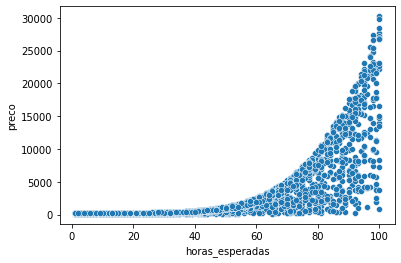

In [14]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

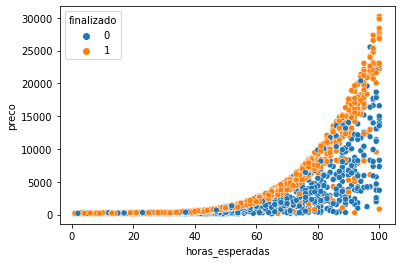

In [15]:
# Pinta os pontos de acordo com a coluna finalizado
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

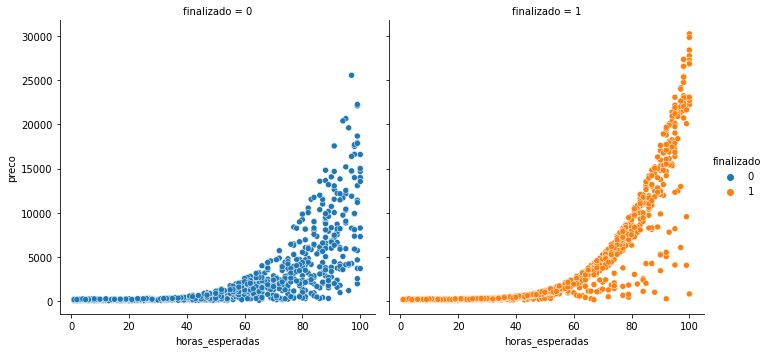

In [16]:
# Colunas de plots diferentes para os projetos finalizados ou não
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [17]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

# Treinar o conjunto de dados
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Treinar o modelo
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

# Prevendo
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


In [19]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


### Curva de Decisão

* Quando estamos trabalhando com duas dimensões (e somente nesses casos), podemos colorir todos os pixels do gráfico de acordo com as possíveis previsões do classificador que criamos
* O algoritmo deve ser capaz de aprender a curva ascendente que vemos no gráfico: quanto mais bem pago e com maior tempo de elaboração, maior chance do projeto ser de fato concluído. 

In [20]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [21]:
# definiremos quantos pixels haverá em cada dimensão
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [22]:
# criarmos um grid entre os dois eixos
# multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [23]:
# A partir do modelo, fazer as previsões predict() para todos esses pontos
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

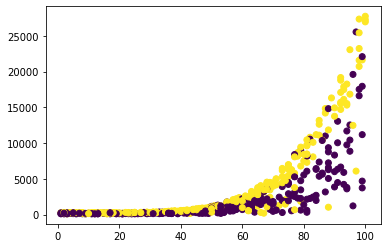

In [24]:
# Plotar os dados
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

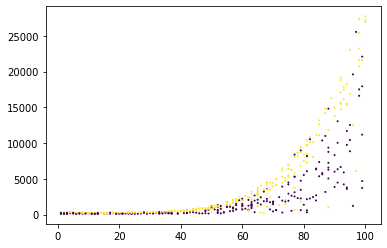

In [25]:
# Melhorar a visualização
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

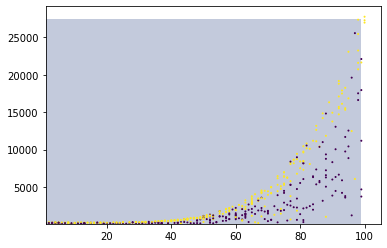

In [26]:
# se o valor for 0 pintaremos de uma cor
# se for 1, de outra
# Adicionaremos uma cor diferente para que possamos visualizar a curva que separa as duas classificações do algoritmo. 
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

## 4️ Support Vector Machine e Não Linearidade

### Estimadores não lineares e support vector machine

* Com o algoritmo do estimador LinearSVC, fomos capazes de encontrar uma borda de decisão na forma de linha
* Esse estimador, que tentou modelar os nossos dados, é capaz de encontrar relacionamentos lineares entre as informações que passamos, mas nada além disso
* Reparando nos nossos dados, percebemos que o relacionamento entre os projetos finalizados ou não parece ser melhor representado por uma curva, e não uma reta
* **Precisamos de outro estimador**
***
No módulo sklearn.smv, teremos diversas variações de algoritmos baseados em uma única ideia: Suport Vector Machines, isto é, SVM. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos lineares

In [27]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


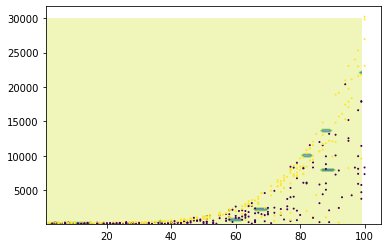

In [28]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

* Analisando a plotagem, percebemos que de fato foram realizados relacionamentos não lineares. Há pequenos agrupamentos de cor diferente que representam as previsões do algoritmo para projetos que terão valor 1, e o restante será 0
* Isso o ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X.

In [29]:
# Escalas distintas em features causam um desbalanço no algoritmo
# Uma alternativa para solucionarmos esse problema é reescalarmos todo o nosso projeto para uma faixa similar. 
# Faremos isso utilizando o escalador padrão do Sklearn, o stadardscaler, que é uma fase de pré-processamento e padronização de valores
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


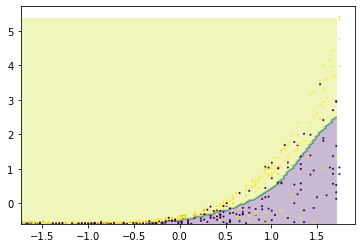

In [30]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

Por mais que LinearSVC tenha tido uma taxa razoável de 64.44%, a linha de decisão na plotagem foi horrível. 
Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.

## 5️ Dummy Classifiers e Árvores de Decisão

### Trabalhando o Conjunto de Dados

In [31]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

# cada linha representa um carro à venda em uma loja online
# Os carros são de diversos donos diferentes, e alguns desses carros foram vendidos e outros não
# De acordo com estas variáveis, tentaremos classificar se um carro será vendido ou não

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [32]:
# Renomear colunas 
dict_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=dict_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [33]:
# Trocar valores de linhas
dict_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(dict_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [34]:
#idade dos veículos em relação ao ano atual
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [35]:
# Coluna com valores em Km 
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [36]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [37]:
# Separando X (as colunas que representam nossas features) e Y (se o carro foi vendido ou não):
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [38]:
#### Testar classificação do Linear SVC

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


Uma acurácia de 57.88%, mas ainda não temos base comparativa para sabermos o quão bom ou ruim é esse resultado.

### Dummy classifiers e svc

SKLearn possui um estimador conhecido como **DummyClassifier**, que é basicamente o que o nome diz: um classificador "bobo"

In [39]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 58.00%


In [40]:
# Estratégia do DummyClassifier, o argumento stratified
# Estimador manterá a proporcionalidade em sua classificação

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 52.44%


In [41]:
# Estratégia do DummyClassifier, o argumento most_frequent, ou "mais frequente"
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [42]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

* Com esse resultado, tivemos em ganho muito grande de acurácia em relação à baseline - aproximadamente 25% de ganho absoluto e 48% de ganho relativo

Algoritmos de classificação como o **Support Vector Machine** são difíceis de estudar e interpretar, e, por esse motivo, são apelidados de **caixa preta**

### Árvore de decisão e Visualizando as decisões de um estimador

* Existem algoritmos que exibem uma sequência de decisões com base nos dados fornecidos, como por exemplo um carro ter menos quilometragens rodadas e ser mais novo, e como essas decisões influenciam na classificação, em uma espécie de "árvore de decisões". 
* Tais classificadores são chamados de decision tree classifiers. 

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definimos o SEED para tornar o experimento replicável
SEED = 5
np.random.seed(SEED)

# Separamos os dados de teste e de treino
# Reescalamos esses dados 
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Criação do modelo DecisionTreeClassifier()
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


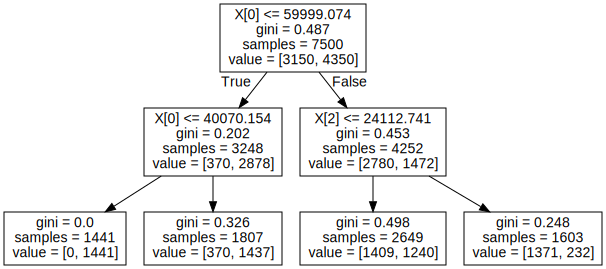

In [60]:
# Exportar a visualização gráfica da árvore de decisões. O nome dessa função é export_graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

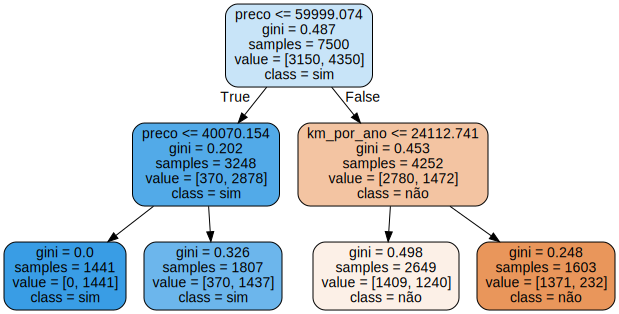

In [61]:
# Passar nome das features
# Quadros coloridos e com bordas arredondadas (filled = True, rounded _ True)
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

* Se um preço for menor que um valor específico, o item será direcionado para a classe "sim", por exemplo, simbolizada pela cor azul. No caso de classificação negativa, teremos a cor laranja. O branco representa uma espécie de incerteza quanto à classificação.

In [62]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

Treinaremos com 7500 elementos e testaremos com 2500 elementos


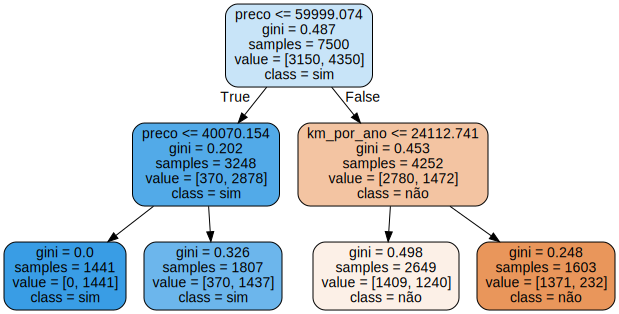

In [63]:
# Passar nome das features
# Quadros coloridos e com bordas arredondadas (filled = True, rounded _ True)
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Treinaremos com 7500 elementos e testaremos com 2500 elementos


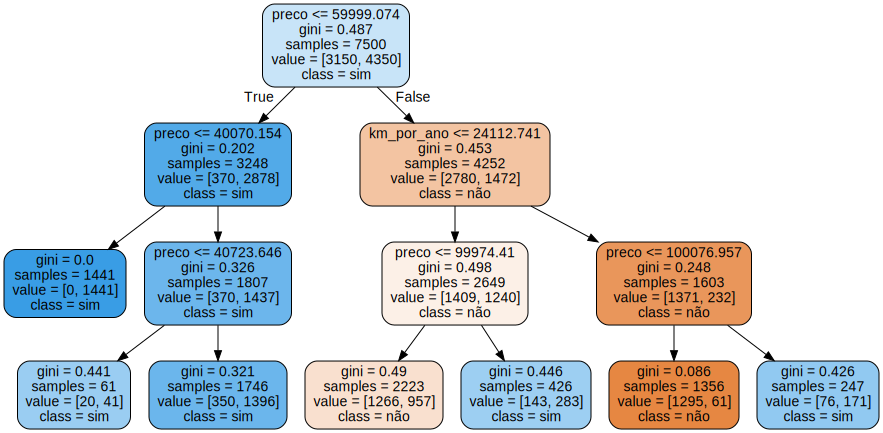

In [65]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

# Passar nome das features
# Quadros coloridos e com bordas arredondadas (filled = True, rounded _ True)
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Alterando o máximo de profundidade (max_depth) para 3, obtermos uma acurácia melhor, nosso gráfico será um pouco maior, com uma profundidade máxima de 3 decisões antes dos resultados.

Os algoritmos do tipo árvore de decisão possuem diversos parâmetros, como o critério para separar os nós da árvore, o mínimo de samples para separar um nó ou definir um nó final, assim como a profundidade.